In [1]:
#Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
#Import dependencies
import numpy as np
import pandas as pd
import datetime as dt 
from sqlalchemy import func



# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)




In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.


orig_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
orig_date


('2017-08-23',)

In [10]:
#Determine one year from most recent data in the data set
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [11]:
#Select one year of data based on >= query_date determined above.
session.query(measurement.date).\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()

    

[('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08-31',),
 ('2016-08

In [12]:
# Perform a query to retrieve the data and precipitation scores

sel = [measurement.date, 
       measurement.prcp]
precip = session.query(*sel).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
precip




[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names

df = pd.DataFrame(precip, columns=['Date', 'Precipitation'])
df

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [14]:
# Sort the dataframe by date
df.sort_values(by=['Date'])

,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2228,2017-08-23,0.08
2226,2017-08-23,0.00
2227,2017-08-23,0.00


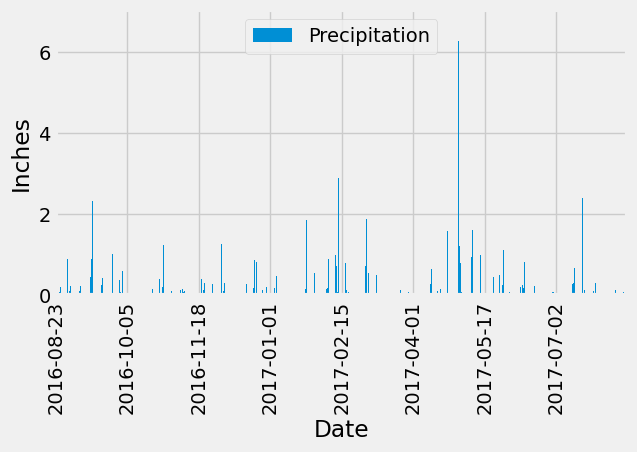

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(df, columns=['Date', 'Precipitation',])
df.set_index('Date', inplace=True)
df.plot.bar()
plt.tight_layout()
plt.ylabel("Inches")
plt.locator_params(axis='x', nbins=8)
plt.xticks(rotation='vertical')
plt.show()


In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(station).count()
print(stations_count)


9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()



[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
#First row based on output of above
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

('USC00519281', 2772)

In [20]:
#Determine first station id only
session.query(measurement.station).group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).first()

('USC00519281',)

In [23]:

# Select all temps for selected station
temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').all()
temps


[(70.0,),
 (62.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (76.0,),
 (69.0,),
 (66.0,),
 (70.0,),
 (75.0,),
 (64.0,),
 (60.0,),
 (61.0,),
 (68.0,),
 (64.0,),
 (66.0,),
 (67.0,),
 (70.0,),
 (67.0,),
 (67.0,),
 (69.0,),
 (60.0,),
 (75.0,),
 (75.0,),
 (65.0,),
 (75.0,),
 (69.0,),
 (67.0,),
 (66.0,),
 (69.0,),
 (72.0,),
 (67.0,),
 (65.0,),
 (64.0,),
 (67.0,),
 (67.0,),
 (68.0,),
 (69.0,),
 (66.0,),
 (69.0,),
 (61.0,),
 (71.0,),
 (70.0,),
 (70.0,),
 (66.0,),
 (71.0,),
 (61.0,),
 (68.0,),
 (67.0,),
 (62.0,),
 (65.0,),
 (69.0,),
 (63.0,),
 (62.0,),
 (61.0,),
 (64.0,),
 (72.0,),
 (68.0,),
 (68.0,),
 (68.0,),
 (71.0,),
 (69.0,),
 (65.0,),
 (67.0,),
 (71.0,),
 (70.0,),
 (69.0,),
 (69.0,),
 (70.0,),
 (69.0,),
 (70.0,),
 (73.0,),
 (74.0,),
 (67.0,),
 (68.0,),
 (64.0,),
 (65.0,),
 (68.0,),
 (68.0,),
 (72.0,),
 (67.0,),
 (64.0,),
 (71.0,),
 (70.0,),
 (72.0,),
 (73.0,),
 (74.0,),
 (69.0,),
 (71.0,),
 (72.0,),
 (71.0,),
 (74.0,),
 (73.0,),
 (71.0,),
 (71.0,),
 (69.0,),
 (69.0,),
 (72.0,),
 (68.0,),
 (75.0,),


In [24]:
#Stations by number of measurements in desc order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).\
    desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(close=None, block=None)>

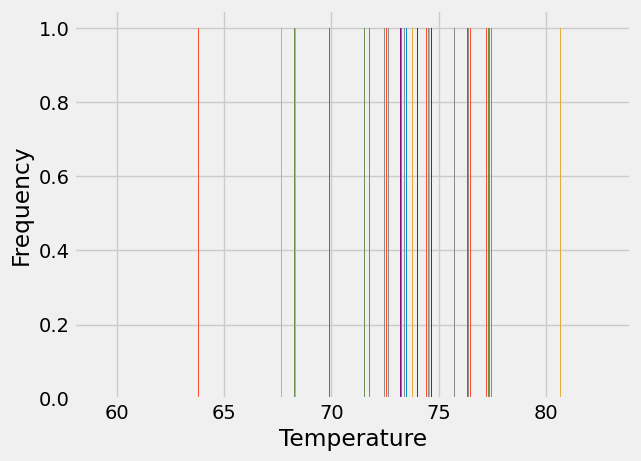

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_hist = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= query_date).\
    order_by(measurement.date).all()
plt.hist(temp_hist, bins=12, histtype='bar', align='mid')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show




# Close Session

In [27]:
# Close Session
session.close()